# Final Team Project: Marketing Strategy Evaluation for New Menu Item
---

## Background and Approach

This project aims to evaluate the effectiveness of three different marketing campaigns for a new menu item introduced by a fast-food chain. Using A/B testing, we will determine which promotion has the greatest impact on sales across various market locations. Our analysis will involve data cleaning, pre-processing, exploratory data analysis (EDA), and the application of data science methods using Python to derive actionable insights.

---

## Importing Required Libraries and Data Pre-Processing

In [15]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [17]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
# Importing dataset
url = "https://raw.githubusercontent.com/gerardcf1/ADS-505/refs/heads/main/WA_Marketing-Campaign.csv"
df = pd.read_csv(url, index_col='MarketID')
df.head()

,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,,,,,,
1,Medium,1,4,3,1,33.73
1,Medium,1,4,3,2,35.67
1,Medium,1,4,3,3,29.03
1,Medium,1,4,3,4,39.25
1,Medium,2,5,2,1,27.81


In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The data set contains 548 records with 6 variables including the target variable promotion. There are no missing values or null values to evaluate, further analysis will be required to transform marketsize into a numeric value.

The average sales across all promotions is about $50,000, as part of our modeling we will aim to determine which promotion is predicted to result in more sales than the other. The independent variables used for our predictive modeling will be location, age of the store, the week the promotion ran, and the sales.

---

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Promotion'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Promotions')

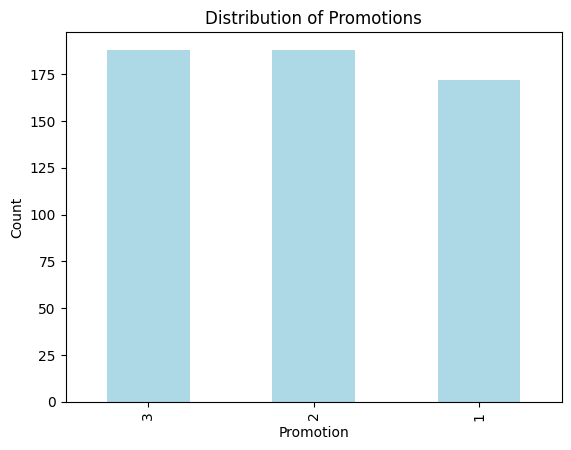

In [21]:
# Barplot of dependent variable, promotion
df['Promotion'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Distribution of Promotions')
plt.show()

The 3 promotions is relatively distributed in the dataset, therefore minimal sampling strategies will be required when training and testing models.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Sales in Thousands')

Text(0.5, 1.0, 'Sales Distribution by Promotion')

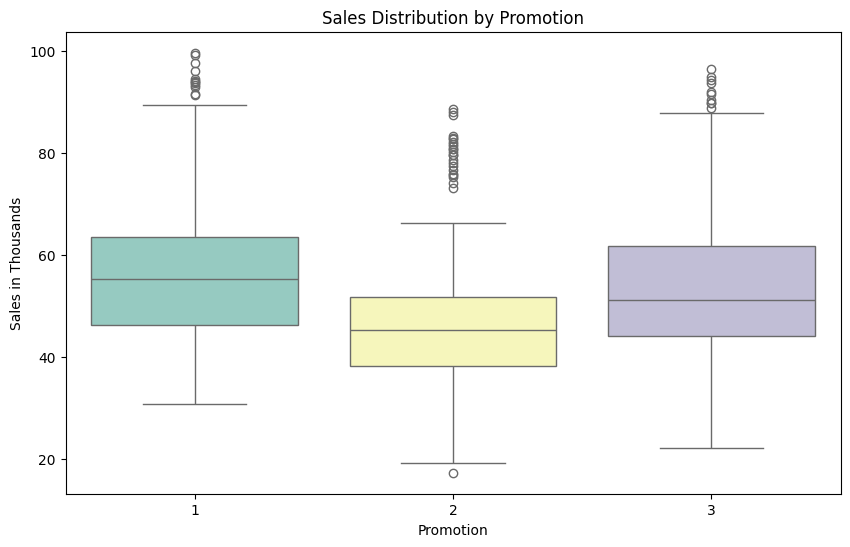

In [19]:
# Create a box plot of Sales by Promotion, highlighting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df, showfliers=True, palette='Set3', hue='Promotion', legend=False)
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.title('Sales Distribution by Promotion')
plt.show()


When comparing the distribution of sales by promotion, promotion 2 performed lower on average.  Promotion 1 and promotion 3 have similar distribution in sales. Since this is a small dataset we will include all records in the model.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

Text(0.5, 0, 'Promotion')

Text(0, 0.5, 'Sales in Thousands')

Text(0.5, 1.0, 'Sales by Promotion and Market Size')

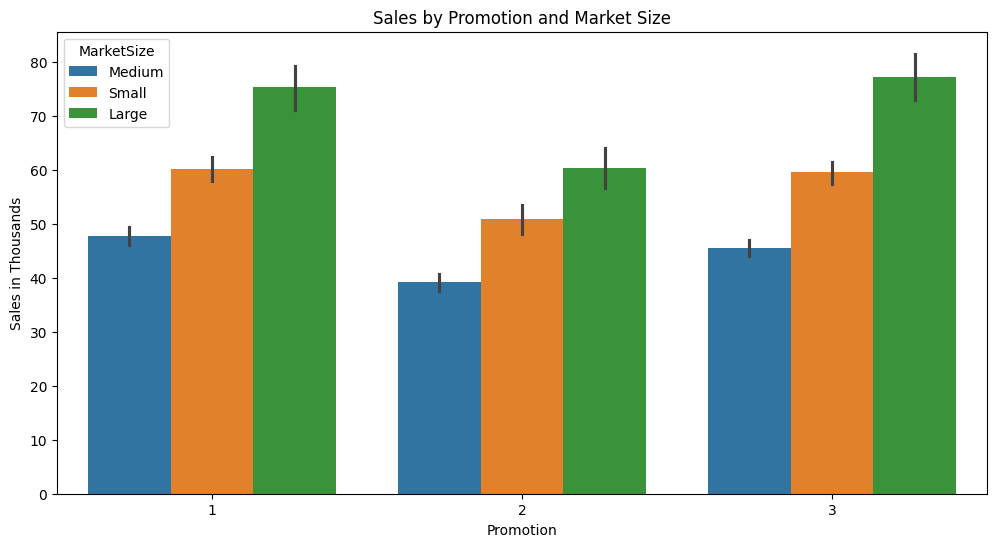

In [20]:
# Create a bar chart of Sales by Promotion and Market Size
plt.figure(figsize=(12, 6))
sns.barplot(x='Promotion', y='SalesInThousands', hue='MarketSize', data=df)
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.title('Sales by Promotion and Market Size')
plt.show()

In [8]:
#preprocess data to create dummy variables for categorical data
X = df[['MarketSize','LocationID','AgeOfStore','Promotion','week']]
y = df['SalesInThousands']
X = pd.get_dummies(X, columns=['MarketSize','LocationID','AgeOfStore','Promotion','week'], drop_first=True)
X = X.astype(int)

X.head()

,MarketSize_Medium,MarketSize_Small,LocationID_2,LocationID_3,LocationID_4,LocationID_5,LocationID_6,LocationID_7,LocationID_8,LocationID_9,...,AgeOfStore_23,AgeOfStore_24,AgeOfStore_25,AgeOfStore_27,AgeOfStore_28,Promotion_2,Promotion_3,week_2,week_3,week_4
MarketID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


---

## Modeling

In [9]:
#Split data to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
acc_lir = round(lr_model.score(X_test, y_test) * 100, 2)

print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")
print(f'Linear Regression Accuracy: {acc_lir}%')


LinearRegression()

Linear Regression:
Mean Squared Error: 1.2408068849687587e+27
R-squared: -4.220540371192464e+24
Linear Regression Accuracy: -4.220540371192464e+26%


In [10]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
acc_dt = round(dt_model.score(X_test, y_test) * 100, 2)

print("\nDecision Tree:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")
print(f'Decision Tree Accuracy: {acc_dt}%')


DecisionTreeRegressor(random_state=42)


Decision Tree:
Mean Squared Error: 49.86615818181818
R-squared: 0.8303828449759674
Decision Tree Accuracy: 83.04%


In [11]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
acc_rf = round(rf_model.score(X_test, y_test) * 100, 2)

print("\nRandom Forest:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f'Random Forest Accuracy: {acc_rf}%')


RandomForestRegressor(random_state=42)


Random Forest:
Mean Squared Error: 41.64787493263642
R-squared: 0.8583369099116561
Random Forest Accuracy: 85.83%


Based on the performance of the linear regression, decision tree, and random forest models, the random forest model outperformed the others in accuracy and r-squared values.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Proportion of Customers Contacted')

Text(0, 0.5, 'Cumulative Gain (Percentage of Sales)')

Text(0.5, 1.0, 'Cumulative Gains Chart - Random Forest')

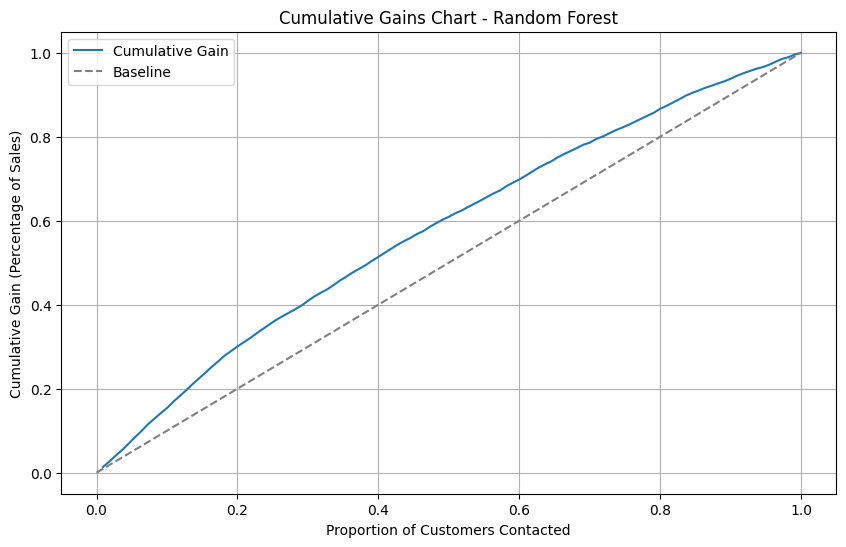

In [22]:
sorted_indices = np.argsort(rf_y_pred)[::-1]  
sorted_y_test = np.array(y_test)[sorted_indices]
sorted_rf_y_pred = rf_y_pred[sorted_indices]

cumulative_sales = np.cumsum(sorted_y_test)
total_sales = cumulative_sales[-1]

proportion_of_customers = np.arange(1, len(cumulative_sales) + 1) / len(cumulative_sales)

cumulative_gain_percentage = cumulative_sales / total_sales

plt.figure(figsize=(10, 6))
plt.plot(proportion_of_customers, cumulative_gain_percentage, label='Cumulative Gain')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Baseline') 
plt.xlabel('Proportion of Customers Contacted')
plt.ylabel('Cumulative Gain (Percentage of Sales)')
plt.title('Cumulative Gains Chart - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Proportion of Customers Contacted')

Text(0, 0.5, 'Cumulative Gain (Percentage of Sales)')

Text(0.5, 1.0, 'Cumulative Gains Chart - Model Comparison')

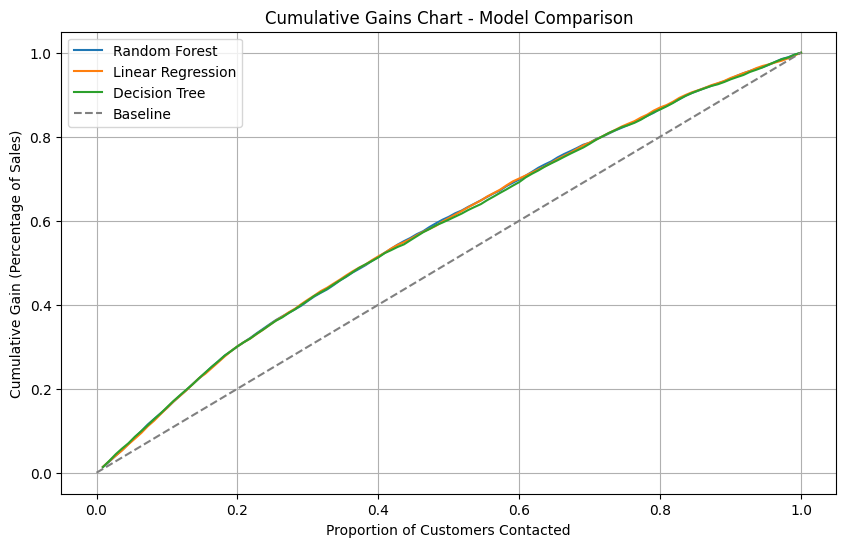

In [23]:
# For Linear Regression
sorted_indices_lr = np.argsort(lr_y_pred)[::-1]  
sorted_y_test_lr = np.array(y_test)[sorted_indices_lr]
sorted_lr_y_pred = lr_y_pred[sorted_indices_lr]

cumulative_sales_lr = np.cumsum(sorted_y_test_lr)
total_sales_lr = cumulative_sales_lr[-1]
proportion_of_customers_lr = np.arange(1, len(cumulative_sales_lr) + 1) / len(cumulative_sales_lr)
cumulative_gain_percentage_lr = cumulative_sales_lr / total_sales_lr

# For Decision Tree
sorted_indices_dt = np.argsort(dt_y_pred)[::-1]  
sorted_y_test_dt = np.array(y_test)[sorted_indices_dt]
sorted_dt_y_pred = dt_y_pred[sorted_indices_dt]

cumulative_sales_dt = np.cumsum(sorted_y_test_dt)
total_sales_dt = cumulative_sales_dt[-1]
proportion_of_customers_dt = np.arange(1, len(cumulative_sales_dt) + 1) / len(cumulative_sales_dt)
cumulative_gain_percentage_dt = cumulative_sales_dt / total_sales_dt

plt.figure(figsize=(10, 6))

plt.plot(proportion_of_customers, cumulative_gain_percentage, label='Random Forest')

plt.plot(proportion_of_customers_lr, cumulative_gain_percentage_lr, label='Linear Regression')

plt.plot(proportion_of_customers_dt, cumulative_gain_percentage_dt, label='Decision Tree')

plt.plot([0, 1], [0, 1], '--', color='gray', label='Baseline')

plt.xlabel('Proportion of Customers Contacted')
plt.ylabel('Cumulative Gain (Percentage of Sales)')
plt.title('Cumulative Gains Chart - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion:

- The cumulative gains chart for model comparison indicates that all three models (**Random Forest, Linear REgression, and Decision Tree**) perform better than the **baseline** (reference line). But Random Forest performed the best overall with the lowest mean squared error (41.65), the highest R-squared (0.858), and the best accuracy(85.83%). The Decision Tree model follows close with a mean squared error of 49.87, R-squared of 0.83, and accuracy of 83.04%. On the other hand, Linear Regression did not performed as good as the rest in terms of absolute accuracy showing a mean squared error of 1.58e+25, R-squared of -5.38e+22, and a very small accuracy (-5.376858852363788e+24%). 

- In terms of cumulative gains, the three models are quite good for predicting campaing effectiveness, but only **Random Forest** is the most reliable model due to its strong perfomance in both accuracy and identifying high-gain customers.

## Actionable insight recommendations:

- Based on the analysis, **Promotion 1** has shown the highest overall effectiveness, particularly in larger markets, with median sales reaching approximately 60 thousand, outperforming Promotions 2 and 3. The data suggests that large markets consistently generate the highest sales across all promotions, but Promotion 1 stands out with fewer extreme outliers and more consistent results. This makes it the ideal choice for high-revenue areas. In medium markets, Promotion 1 still performs well, though smaller markets see a noticeable drop in performance across all promotions, highlighting a need for more targeted strategies. Additionally, examining sales trends over time reveals potential for optimizing weekly promotions, as weeks like week 4 under Promotion 1 show a slight boost in performance. This could inform future campaigns to focus on time periods with the highest sales impact.

## Recommended Next Steps:

- Given the success of **Promotion 1**, the next step should be to roll it out in large markets where it has shown the greatest impact. For smaller markets, a modified version of Promotion 1 could be tested to see if similar success can be replicated. Further A/B testing could focus on refining Promotions 2 and 3 to better cater to small market areas where Promotion 1 does not perform as strongly. Moreover, the sales fluctuations observed over time suggest that campaigns should be adjusted on a weekly basis, with increased promotional intensity during periods where sales historically peak, such as week 4. Targeted time-sensitive campaigns could maximize promotional effectiveness and optimize return on investment.